# This is for plotting structure function under neutral condition 
## 2021-11-14 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os.path
import pickle
import time
from matplotlib.pyplot import figure
import scipy.io as sio
from datetime import date, timedelta
IN_DIRECTORY = "/projectnb/urbanclimate/yueqin/idaho_2020/basic_processed_data/"
IN_DIRECTORY2 = "/projectnb/urbanclimate/yueqin/idaho_2020/processeddata/"
msk_DIR = "/projectnb/urbanclimate/yueqin/idaho_2020/mask/"
OUT_DIRECTORY = "/projectnb/urbanclimate/yueqin/idaho_2020/fig_neutral/"
ins_var=['u_ins','v_ins','w_ins'] # 36000 instantaneous variables per hour 
tur_var=['u_tur','v_tur','w_tur'] # 36000 instantaneous variables per hour 
avg_var=['L_H2','u_star'] # 1 averaged variable per hour
flg_var=['diag_csat_ins','sig_irga_ins']
msk = ['mask_INL_all_1d']

In [2]:
def date_list(sdate,edate):
    """method used for creating date list"""
    delta = edate - sdate       # as timedelta
    day = [sdate+timedelta(days=x) for x in range(delta.days+1)]
    return day
def create_ins_df(inpt):
    df = pd.DataFrame(inpt).copy()
    df['DateTime'] = ts
    return df
def strcture(inpt,ind):
#     skip = round(rpat/num)
    num = len(ind)
    D2 = np.zeros((num,sonum))+np.nan
    r = np.zeros((num,sonum))+np.nan
    var_mean = np.nanmean(inpt,0)
    for j in range(num):
        cov = (inpt[0:(rpat-ind[j]),:]-inpt[ind[j]-1:rpat,:])**2
        D2[j,:] = np.nanmean(cov,0)
        r[j,:]=ind[j]*var_mean/frequency
#         print(np.nanmean(inpt.iloc[:,0:12].to_numpy(),0))
#     D2_df = pd.DataFrame(D2, columns=list_col).copy()
#     r_df = pd.DataFrame(r, columns=list_col).copy()
    return D2,r
def strcture2(inpt,ind):
#     skip = round(rpat/num)
    num = len(ind)
    D2 = np.zeros((num,sonum))+np.nan
    r = np.zeros((num,sonum))+np.nan
    var_mean = np.nanmean(inpt,0)
    for j in range(num):
        cov = (np.roll(inpt,ind[j],axis=0)-np.roll(inpt,-ind[j],axis=0))**2
#         cov = (inpt[-ind[j]:(rpat-ind[j]),:]-inpt[ind[j]-1:rpat+,:])**2
        D2[j,:] = np.nanmean(cov,0)
        r[j,:]=ind[j]*var_mean/frequency
#         print(np.nanmean(inpt.iloc[:,0:12].to_numpy(),0))
#     D2_df = pd.DataFrame(D2, columns=list_col).copy()
#     r_df = pd.DataFrame(r, columns=list_col).copy()
    return D2,r

In [3]:
sonum    =12                       # number of sonic
z        =[1.2,2,3.5,6,8.2,12.8,15.8,23,30.3,40.2,50.6,60.5];                 # height of sonic above ground, m
frequency=10                   # sampling frequency, Hz
time_avg =3600                  # average time, s
rpat = time_avg*frequency           # number of lines for a loop

# physical constants (or values that are assumed constant)
Rw  = 461.5     # ideal gas constant for water vapor, J/kg*K
Rd  = 287.05    # ideal gas constant for dry air, J/kg*K
Lv  = 1000*2257 # latent heat of vaporization (water), J/kg
Cp  = 1005      # approximate constant pressure specific heat of air, J/kg*K
kappa   = 0.4       # Von Karman constant
g   = 9.81      # acceleration of gravity, m/s^2
list_col = ['C1','C2','C3','C4','B1','B2','B3','B4','A1','A2','A3','A4']

Sdate = date(2020,9,25)
Edate = date(2020,9,25)
ds = date_list(Sdate,Edate)
u_ins_df = np.zeros((24*rpat,sonum,len(ds)))+np.nan
v_ins_df = np.zeros((24*rpat,sonum,len(ds)))+np.nan
w_ins_df = np.zeros((24*rpat,sonum,len(ds)))+np.nan
u_tur_df = np.zeros((24*rpat,sonum,len(ds)))+np.nan
v_tur_df = np.zeros((24*rpat,sonum,len(ds)))+np.nan
w_tur_df = np.zeros((24*rpat,sonum,len(ds)))+np.nan
ts_df = np.zeros((24*rpat,len(ds)))+np.nan

# n_r = 3000
j_r = np.arange(1, 8001, 1)
name = "Structure Function"
ldg = np.array(['C1','C2','C3','C4','B1','B2','B3','B4','A1','A2','A3','A4'])
ldg = np.array(['sonic 1','sonic 2','sonic 3','sonic 4','sonic 5','sonic 6', 'sonic 7', 'sonic 8','sonic 9','sonic 10',
                'sonic 11', 'sonic 12'])
list_ind = range(5,11)
# select_for_fit_variance = list(range(5,11))
# print(select_for_fit_variance)
# ldg[list_ind]

# set up controls

In [4]:
do_processing = False
do_saving = False

NameError: name 'u_ins' is not defined

# Load instantaneous data and combine multiple days into one array

start loading:20200925
start processing:20200925
netral case:2020-09-25 16:30:00.000
1


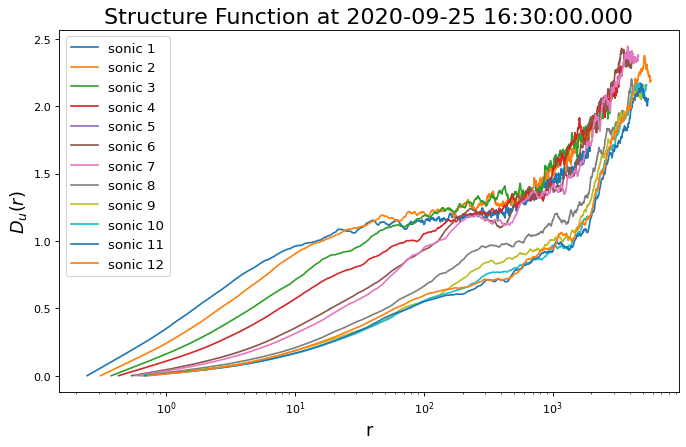

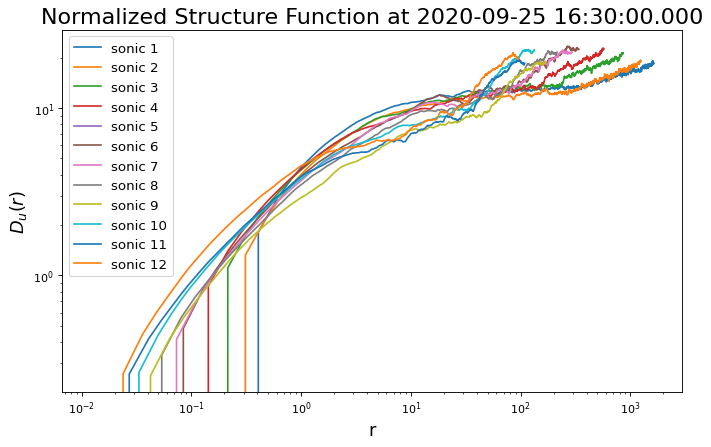

Finish loading:20200925
finish processing:20200925
CPU times: user 52 s, sys: 1.65 s, total: 53.6 s
Wall time: 55.6 s


In [5]:
%%time
t_id = 0
i_hr_total = 0
for iday in range(len(ds)):
    cyr = str(ds[iday].year)
    if ds[iday].month < 10:
        cmonth = '0'+ str(ds[iday].month)
    else:
        cmonth = str(ds[iday].month) 
    if ds[iday].day < 10:
        cdys = '0'+ str(ds[iday].day)
    else:
        cdys = str(ds[iday].day)
    fp_stats = IN_DIRECTORY + 'u_ins_' + cyr + cmonth + cdys +'.pkl'
    if (not os.path.isfile(fp_stats)):
        print(cyr + cmonth + cdys+' do not exist')
        continue
#     else:
    print('start loading:'+ cyr + cmonth + cdys)
    # load neutral mask
    b_file = open(msk_DIR + 'mask_neutral_' + cyr + cmonth + cdys +'.pkl', "rb")
    mask_neutral = pickle.load(b_file)    
    b_file.close()
    if not any(mask_neutral):
        continue
    # load masks
    for var in msk:
        a_file = open(msk_DIR + var +'_' + cyr + cmonth + cdys +'.pkl', "rb")
        globals()[var] = pickle.load(a_file)    
        a_file.close()
    nan_msk=np.isnan(mask_INL_all_1d)
    if all(nan_msk):
        continue
    print('start processing:'+ cyr + cmonth + cdys)
    # load ins,avg
    for var in ins_var+avg_var: 
        a_file = open(IN_DIRECTORY + var +'_' + cyr + cmonth + cdys +'.pkl', "rb")
        globals()[var] = pickle.load(a_file)    
        a_file.close() 
    # load datetime
    b_file = open(IN_DIRECTORY2 + 'date_time_' + cyr + cmonth + cdys +'.pkl', "rb")
    date_time = pickle.load(b_file)    
    b_file.close() 
    # load quality flags
#         for var in flg_var:
#             a_file = open(IN_DIRECTORY2 + var +'_' + cyr + cmonth + cdys +'.pkl', "rb")
#             globals()[var] = pickle.load(a_file)    
#             a_file.close()
    i_hr = 0
#     for i in range(len(mask_neutral)):
    for i in [16]:
        if mask_neutral[i] and (~nan_msk[i]):
            print('netral case:' + date_time[i])
            u_sel = u_ins[i_hr*rpat:(i_hr+1)*rpat-1,:]
            D_u_2,r = strcture(u_sel,j_r)
            print('1')
            plt.figure(figsize=(10, 6), dpi=80)
            plt.semilogx(r,D_u_2)
            plt.legend(ldg, fontsize = 12)
            plt.title("Structure Function at "+date_time[i],fontsize=20)
            plt.xlabel("r",fontsize=16)
            plt.ylabel("$D_u(r)$",fontsize=16)
            f=plt.gcf()
            plt.show()
            a=(u_star[i_hr])**2
            D_u = D_u_2/a.T
            r = r/z
#             print('2')
            plt.figure(figsize=(10, 6), dpi=80)
            plt.loglog(r,D_u)
            plt.legend(ldg, fontsize = 12)
            plt.title("Normalized Structure Function at "+date_time[i],fontsize=20)
            plt.xlabel("r",fontsize=16)
            plt.ylabel("$D_u(r)$",fontsize=16)
            f=plt.gcf()
            plt.show()
#             print('3')
            if i_hr_total==0:
                neutral_datetime = [date_time[i]]
            else:
                neutral_datetime = neutral_datetime+[date_time[i]]
            i_hr += 1
            i_hr_total += 1
    print('Finish loading:'+ cyr + cmonth + cdys)

#         cdatetime = cyr +'-' + cmonth +'-'+cdys
#         st_datetime = pd.Timestamp(int(cyr),int(cmonth),int(cdys),0)
#         ed_datetime = pd.Timestamp(int(cyr),int(cmonth),int(cdys),23)
#         DateTime = pd.date_range(start=st_datetime, end=ed_datetime, periods=24)
#         ts = np.repeat(DateTime,rpat)
#         ts_df[:,t_id]=ts
#         u_ins_df[:,:,t_id]=u_ins
#         v_ins_df[:,:,t_id]=v_ins
#         w_ins_df[:,:,t_id]=w_ins

    print('finish processing:'+ cyr + cmonth + cdys)
    t_id += 1


In [36]:
# pd.DataFrame(test)
j_r
u_ins[1,:]

array([0.2478881 , 2.1012852 , 2.24037995, 2.51021222,        nan,
       2.97024809, 3.92932387, 4.39798719, 4.67920527, 4.79325616,
       5.08989849, 6.57281236])

In [7]:
np.shape(D_u_2)

(9000, 12)

In [22]:
np.shape(D_u_2)

(9000, 12)

In [41]:
a=(u_star[i_hr])**2
D_u = D_u_2/a.T
r = r/z
D_u[0:10,10]

array([0.        , 0.6673768 , 1.07256953, 1.38976439, 1.65578601,
       1.90410825, 2.11752864, 2.31315972, 2.49268377, 2.66274213])

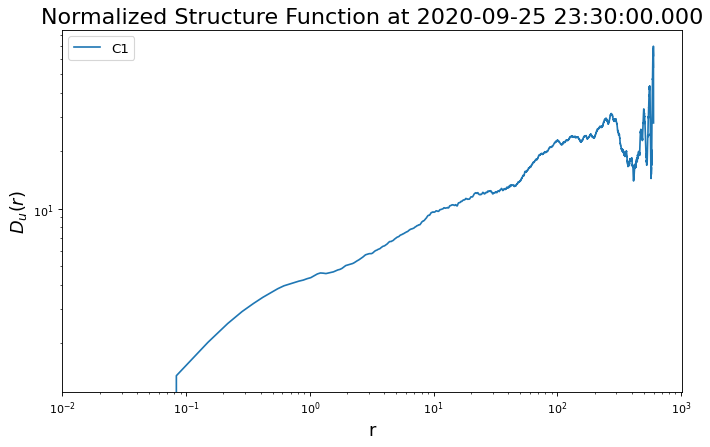

In [53]:
plt.figure(figsize=(10, 6), dpi=80)
plt.loglog(r[:,10],D_u[:,10])
plt.legend(ldg, fontsize = 12)
plt.title("Normalized Structure Function at "+date_time[i],fontsize=20)
plt.xlabel("r",fontsize=16)
plt.ylabel("$D_u(r)$",fontsize=16)
f=plt.gcf()
plt.show()

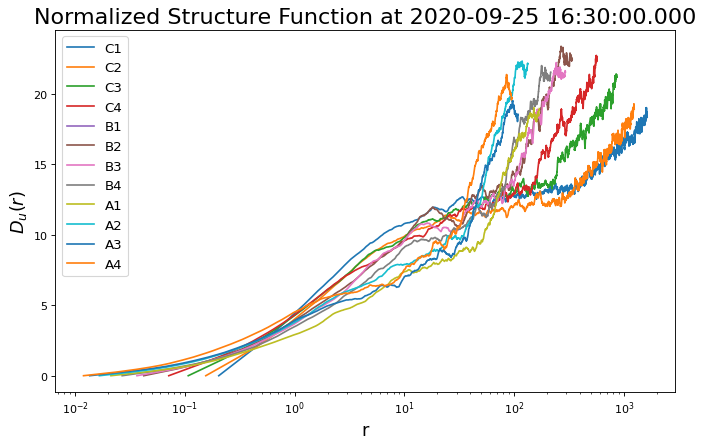

In [58]:
plt.figure(figsize=(10, 6), dpi=80)
plt.semilogx(r,D_u)
plt.legend(ldg, fontsize = 12)
plt.title("Normalized Structure Function at "+date_time[i],fontsize=20)
plt.xlabel("r",fontsize=16)
plt.ylabel("$D_u(r)$",fontsize=16)
f=plt.gcf()
plt.show()

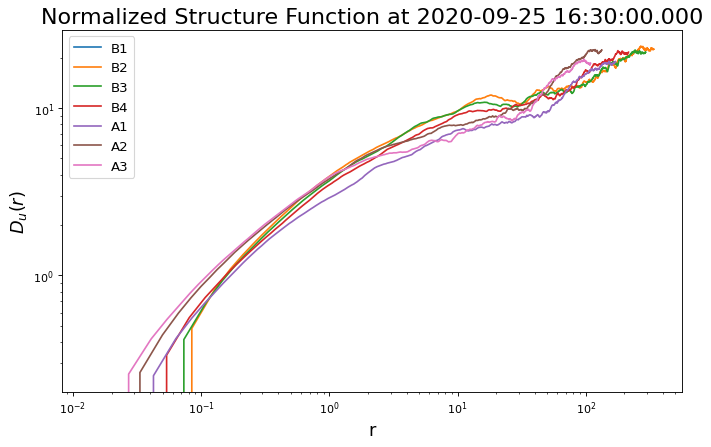

In [74]:
plt.figure(figsize=(10, 6), dpi=80)
plt.loglog(r[:,4:11],D_u[:,4:11])
plt.legend(ldg[4:11], fontsize = 12)
plt.title("Normalized Structure Function at "+date_time[i],fontsize=20)
plt.xlabel("r",fontsize=16)
plt.ylabel("$D_u(r)$",fontsize=16)
f=plt.gcf()
plt.show()

In [68]:
np.shape((j_r*0.1)[4:11])

(7,)

# Modified structure function, energy spectrum
## Nov 23

start loading:20200925
start processing:20200925
Finish loading:20200925
netral case:2020-09-25 16:30:00.000


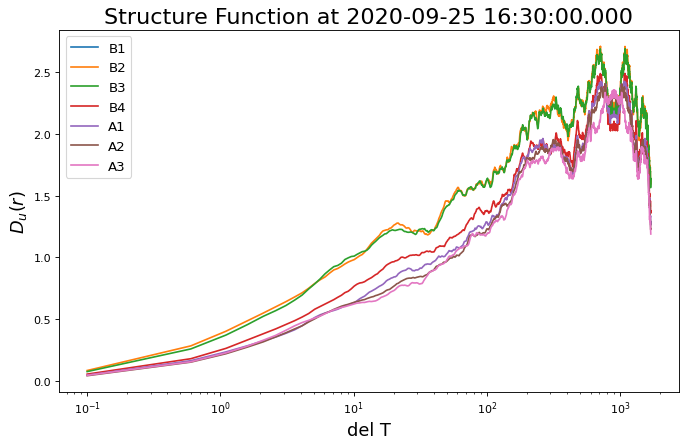

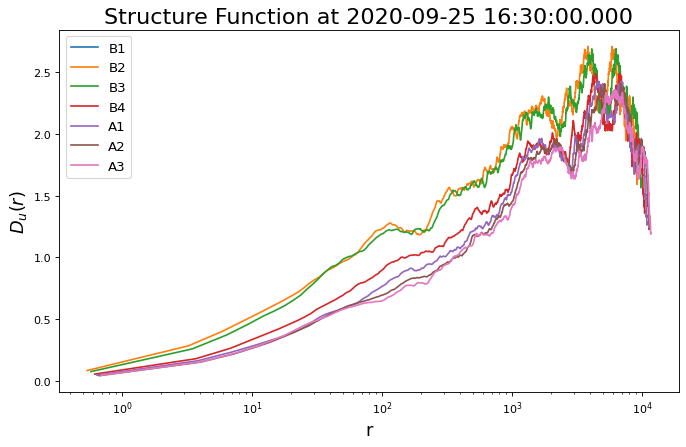

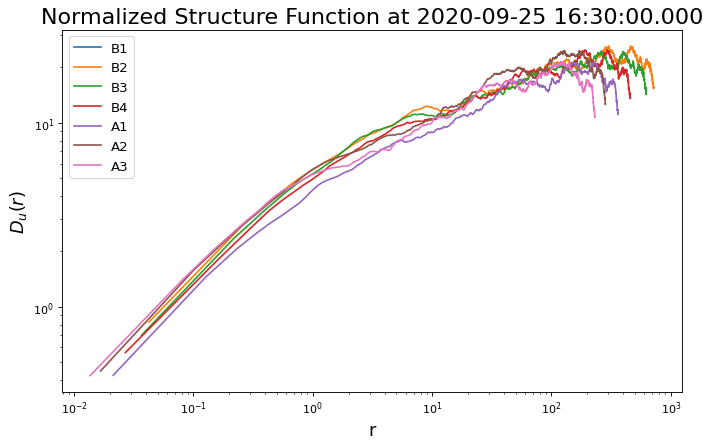

finish processing:20200925
CPU times: user 28.3 s, sys: 3.5 s, total: 31.8 s
Wall time: 33.9 s


In [9]:
%%time
t_id = 0
i_hr_total = 0
j_r = np.arange(1, 17001, 5)
for iday in range(len(ds)):
    cyr = str(ds[iday].year)
    if ds[iday].month < 10:
        cmonth = '0'+ str(ds[iday].month)
    else:
        cmonth = str(ds[iday].month) 
    if ds[iday].day < 10:
        cdys = '0'+ str(ds[iday].day)
    else:
        cdys = str(ds[iday].day)
    fp_stats = IN_DIRECTORY + 'u_ins_' + cyr + cmonth + cdys +'.pkl'
    if (not os.path.isfile(fp_stats)):
        print(cyr + cmonth + cdys+' do not exist')
        continue
#     else:
    print('start loading:'+ cyr + cmonth + cdys)
    # load neutral mask
    b_file = open(msk_DIR + 'mask_neutral_' + cyr + cmonth + cdys +'.pkl', "rb")
    mask_neutral = pickle.load(b_file)    
    b_file.close()
    if not any(mask_neutral):
        continue
    # load masks
    for var in msk:
        a_file = open(msk_DIR + var +'_' + cyr + cmonth + cdys +'.pkl', "rb")
        globals()[var] = pickle.load(a_file)    
        a_file.close()
    nan_msk=np.isnan(mask_INL_all_1d)
    if all(nan_msk):
        continue
    print('start processing:'+ cyr + cmonth + cdys)
    # load ins,avg
    for var in ins_var+avg_var: 
        a_file = open(IN_DIRECTORY + var +'_' + cyr + cmonth + cdys +'.pkl', "rb")
        globals()[var] = pickle.load(a_file)    
        a_file.close() 
    # load datetime
    b_file = open(IN_DIRECTORY2 + 'date_time_' + cyr + cmonth + cdys +'.pkl', "rb")
    date_time = pickle.load(b_file)    
    b_file.close() 
    print('Finish loading:'+ cyr + cmonth + cdys)
    i_hr = 0
#     for i in range(len(mask_neutral)):
    for i in [16]: # only plot 2020-9-25 16:30 case
        if mask_neutral[i] and (~nan_msk[i]):
            print('netral case:' + date_time[i])
            u_sel = u_ins[i_hr*rpat:(i_hr+1)*rpat-1,:]
            D_u_22,r_2 = strcture2(u_sel,j_r)
            plt.figure(figsize=(10, 6), dpi=80)
            plt.semilogx(j_r*0.1,D_u_22[:,4:11])
            plt.legend(ldg[4:11], fontsize = 12)
            plt.title("Structure Function at "+date_time[i],fontsize=20)
            plt.xlabel("del T",fontsize=16)
            plt.ylabel("$D_u(r)$",fontsize=16)
            f=plt.gcf()
            plt.show()
            
            plt.figure(figsize=(10, 6), dpi=80)
            plt.semilogx(r_2[:,4:11],D_u_22[:,4:11])
            plt.legend(ldg[4:11], fontsize = 12)
            plt.title("Structure Function at "+date_time[i],fontsize=20)
            plt.xlabel("r",fontsize=16)
            plt.ylabel("$D_u(r)$",fontsize=16)
            f=plt.gcf()
            plt.show()
            
            a=(u_star[i_hr])**2
            D_u2 = D_u_22/a.T
            rr = r_2/z
            plt.figure(figsize=(10, 6), dpi=80)
            plt.loglog(rr[:,4:11],D_u2[:,4:11])
            plt.legend(ldg[4:11], fontsize = 12)
            plt.title("Normalized Structure Function at "+date_time[i],fontsize=20)
            plt.xlabel("r",fontsize=16)
            plt.ylabel("$D_u(r)$",fontsize=16)
            f=plt.gcf()
            plt.show()

            if i_hr_total==0:
                neutral_datetime = [date_time[i]]
            else:
                neutral_datetime = neutral_datetime+[date_time[i]]
            i_hr += 1
            i_hr_total += 1
    

#         cdatetime = cyr +'-' + cmonth +'-'+cdys
#         st_datetime = pd.Timestamp(int(cyr),int(cmonth),int(cdys),0)
#         ed_datetime = pd.Timestamp(int(cyr),int(cmonth),int(cdys),23)
#         DateTime = pd.date_range(start=st_datetime, end=ed_datetime, periods=24)
#         ts = np.repeat(DateTime,rpat)
#         ts_df[:,t_id]=ts
#         u_ins_df[:,:,t_id]=u_ins
#         v_ins_df[:,:,t_id]=v_ins
#         w_ins_df[:,:,t_id]=w_ins

    print('finish processing:'+ cyr + cmonth + cdys)
    t_id += 1

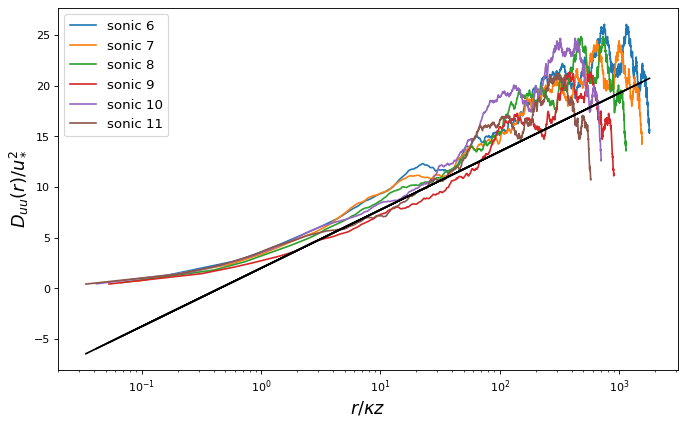

In [35]:
# plt.figure(figsize=(10, 6), dpi=80)
# plt.semilogx(j_r,D_u_22[:,4:11])
# plt.legend(ldg, fontsize = 12)
# plt.title("Structure Function at "+date_time[i],fontsize=20)
# plt.xlabel("r",fontsize=16)
# plt.ylabel("$D_u(r)$",fontsize=16)
# f=plt.gcf()
# plt.show()

# #             print('2')
# plt.figure(figsize=(10, 6), dpi=80)
# plt.loglog(rr[:,4:11],D_u2[:,4:11])
# plt.legend(ldg, fontsize = 12)
# plt.title("Normalized Structure Function at "+date_time[i],fontsize=20)
# plt.xlabel("r",fontsize=16)
# plt.ylabel("$D_u(r)$",fontsize=16)
# f=plt.gcf()
# plt.show()
rr = r_2/z/0.4
plt.figure(figsize=(10, 6), dpi=80)
plt.semilogx(rr[:,list_ind],D_u2[:,list_ind])
plt.semilogx(rr[:,list_ind],2.5*np.log(rr[:,list_ind])+2,'k')
plt.legend(ldg[list_ind], fontsize = 12)
# plt.title("Normalized Structure Function at "+date_time[i],fontsize=20)
plt.xlabel("$r/ \kappa z$",fontsize=16)
plt.ylabel("$D_{uu}(r)/u^2_*$",fontsize=16)
f=plt.gcf()
plt.show()
f.savefig(OUT_DIRECTORY+'stucture20209251630.png')

In [22]:
rr[:,select_for_fit_variance]

array([[1.05679899e-01, 9.16201875e-02, 6.72133992e-02, 5.30787734e-02,
        4.16218670e-02, 3.39838020e-02],
       [6.34079395e-01, 5.49721125e-01, 4.03280395e-01, 3.18472640e-01,
        2.49731202e-01, 2.03902812e-01],
       [1.16247889e+00, 1.00782206e+00, 7.39347391e-01, 5.83866507e-01,
        4.57840537e-01, 3.73821823e-01],
       ...,
       [1.79507877e+03, 1.55626050e+03, 1.14168680e+03, 9.01596044e+02,
        7.06989033e+02, 5.77248862e+02],
       [1.79560717e+03, 1.55671861e+03, 1.14202287e+03, 9.01861438e+02,
        7.07197142e+02, 5.77418781e+02],
       [1.79613557e+03, 1.55717671e+03, 1.14235893e+03, 9.02126832e+02,
        7.07405252e+02, 5.77588700e+02]])